In [1]:
import pandas as pd
import numpy as np
import prepare as p

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
                                  
import graphviz
from graphviz import Graph

from scipy import stats

In [2]:
df = pd.read_csv('data/healthcare-dataset-stroke-data.csv')

In [3]:
import prepare

In [4]:
df = prepare.prep_data(df)

In [5]:
df = df.drop(columns='age_range')

In [6]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,30.6,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
# create age group dataFrames

over_65 = df[df.age >= 65]
adult_40_65 = df[(df.age >= 40) & (df.age < 65)]
adult_25_40 = df[(df.age >= 25) & (df.age < 40)] # greater than or equal to 25, under 40
adult_18_25 = df[(df.age >= 18) & (df.age < 25)]

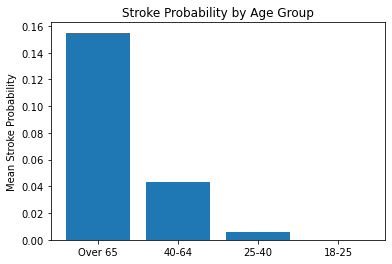

In [8]:
heights = [round(over_65.stroke.mean(), 3), round(adult_40_65.stroke.mean(), 3), round(adult_25_40.stroke.mean(), 3), round(adult_18_25.stroke.mean(), 3)]
x_labels = ['Over 65', '40-64', '25-40', '18-25']
plt.bar(x=x_labels, height=heights)
plt.ylabel("Mean Stroke Probability")
plt.title('Stroke Probability by Age Group')
plt.show()

Adult Body Mass Index or BMI
> - If your BMI is less than 18.5, it falls within the underweight range.
> - If your BMI is 18.5 to 24.9, it falls within the normal or Healthy Weight range.
> - If your BMI is 25.0 to 29.9, it falls within the overweight range.
> - If your BMI is 30.0 or higher, it falls within the obese range.

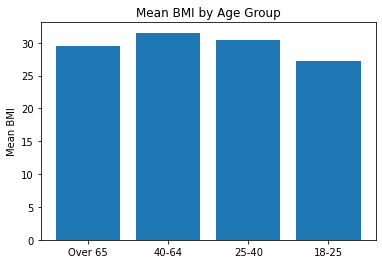

In [9]:
heights = [round(over_65.bmi.mean(), 3), round(adult_40_65.bmi.mean(), 3), round(adult_25_40.bmi.mean(), 3), round(adult_18_25.bmi.mean(), 3)]
x_labels = ['Over 65', '40-64', '25-40', '18-25']
plt.bar(x=x_labels, height=heights)
plt.ylabel("Mean BMI")
plt.title('Mean BMI by Age Group')
plt.show()

# Looking specifically at age group 25 - 40

In [16]:
adult_25_40.size, adult_25_40.shape

(10263, (933, 11))

In [17]:
adult_25_40.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 933 entries, 49 to 5106
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             933 non-null    object 
 1   age                933 non-null    float64
 2   hypertension       933 non-null    object 
 3   heart_disease      933 non-null    object 
 4   ever_married       933 non-null    object 
 5   work_type          933 non-null    object 
 6   residence_type     933 non-null    object 
 7   avg_glucose_level  933 non-null    float64
 8   bmi                933 non-null    float64
 9   smoking_status     933 non-null    object 
 10  stroke             933 non-null    int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 87.5+ KB


In [10]:
adult_25_40.bmi.mean()

30.452840300107166

In [18]:
uw = adult_25_40[adult_25_40.bmi < 18.5]
normal = adult_25_40[(adult_25_40.bmi >= 18.5) & (adult_25_40.bmi < 25)]
ow = adult_25_40[(adult_25_40.bmi >= 25) & (adult_25_40.bmi < 30)]
obese = adult_25_40[adult_25_40.bmi >= 30]

In [19]:
uw.shape, normal.shape, ow.shape, obese.shape

((5, 11), (235, 11), (281, 11), (412, 11))

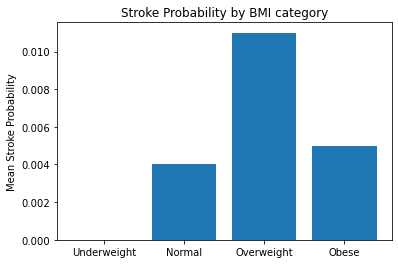

In [20]:
heights = [round(uw.stroke.mean(), 3), round(normal.stroke.mean(), 3), round(ow.stroke.mean(), 3), round(obese.stroke.mean(), 3)]
x_labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
plt.bar(x=x_labels, height=heights)
plt.ylabel("Mean Stroke Probability")
plt.title('Stroke Probability by BMI category')
plt.show()

In [21]:
obese.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
49,Female,39.0,1,0,Yes,Private,Rural,58.09,39.2,smokes,1
133,Female,38.0,0,0,Yes,Private,Rural,101.45,31.1,formerly smoked,1
257,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0
261,Female,37.0,0,0,Yes,Private,Rural,162.96,39.4,never smoked,0
264,Male,35.0,0,0,No,Private,Rural,85.37,33.0,never smoked,0


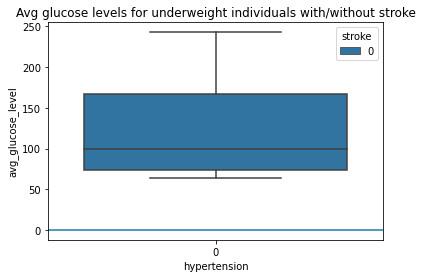

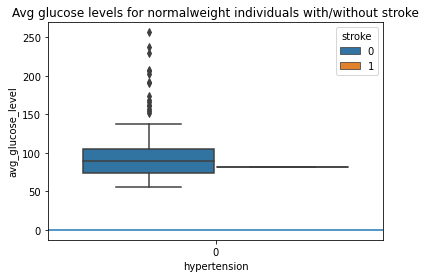

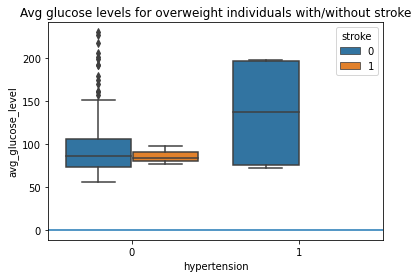

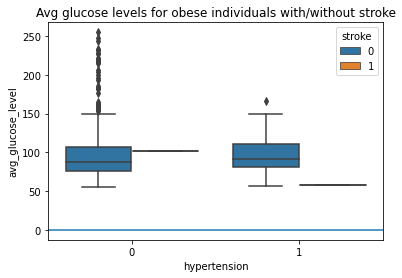

In [27]:
list_of_df = [uw, normal, ow, obese]
list_of_df_names = ['underweight', 'normalweight', 'overweight', 'obese']

i=0

for df in list_of_df:
    plt.title(f"Avg glucose levels for {list_of_df_names[i]} individuals with/without stroke")
    i+=1
    sns.boxplot(x="hypertension", y="avg_glucose_level", data=df, hue="stroke")
    population_survival_rate = df.stroke.mean()
    plt.axhline(population_survival_rate)
    plt.show()

In [ ]:
# Takeaways: for models
- No strokes or hypertension for underweight individuals
- No hypertension for normalweight individuals
- OW individuals with hypertension have higher avg_glucose_levels
- 

In [28]:
normal.stroke.sum()

1